In [1]:
# Import Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the Titanic train file

train = pd.read_csv('titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
# Check out the null instances in the dataset

train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


<AxesSubplot:>

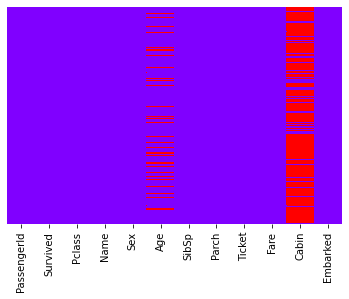

In [6]:
# Use Seaborn to create an heatmap of the void

sns.heatmap(train.isnull(), cmap='rainbow', yticklabels = False, cbar=False)

## Exploratory Data Analysis

In [7]:
# Set the seaborn style

sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

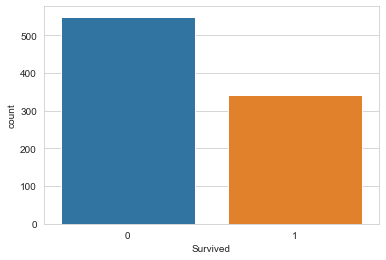

In [8]:
sns.countplot(data = train, x = 'Survived')

###### The above visualization shows that the deceased(-550) are barely twice as much as the survivors(-350)

<AxesSubplot:xlabel='Survived', ylabel='count'>

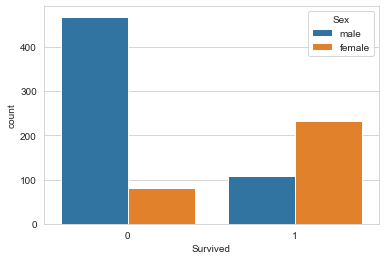

In [9]:
# Another countplot with sex as hue

sns.countplot(data = train, x = 'Survived', hue='Sex')

##### This shows that we have way more deceased male than female and more female survivors (twice as much) than the male survivors.

<AxesSubplot:xlabel='Survived', ylabel='count'>

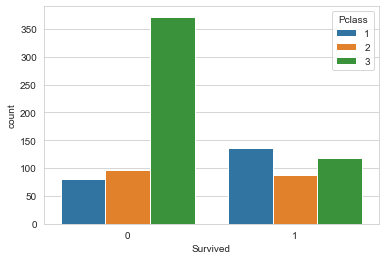

In [10]:
# Make another countplot with the passenger class hue.

sns.countplot(data = train, x = 'Survived', hue='Pclass')

###### The third class passengers suffered way more deaths(well over 350) than other classes while the other classes suffered less(each less than 100). The first class passengers had more survivors than deceased as the second class passengers had the least survivors of the classes. 

###### This shows that perhaps priority had been giving to save the first class passengers over the other two.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

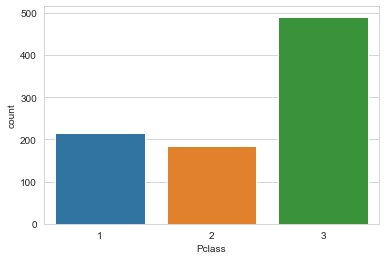

In [11]:
# Check out the number of people per class

sns.countplot(data=train, x='Pclass')

###### With the third class passengers close to 500, they have more than double the count of other passenger classes. 

###### They are the cheapest class so, the most populated, they were the least priority when it came to saving.

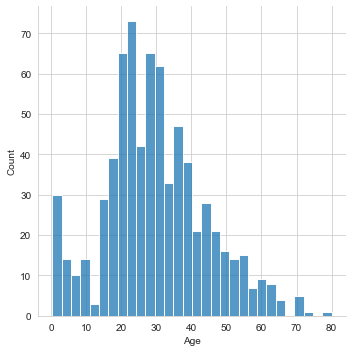

In [12]:
# Let's check out the age representation of people on baord

sns.displot(train['Age'].dropna(), bins=30)

##### This shows that there were less children and oldies on board. There were more young people on deck.

#### Exploring the SibSp column to see how many people had siblings, spouse or any other relations

<AxesSubplot:xlabel='SibSp', ylabel='count'>

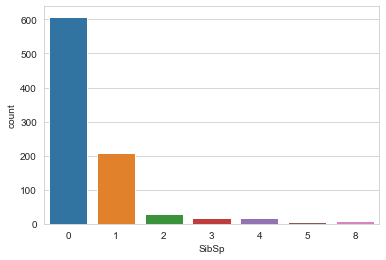

In [13]:
sns.countplot(data = train, x='SibSp')

##### The above distribution shows that single people were significantly more in the ship. 

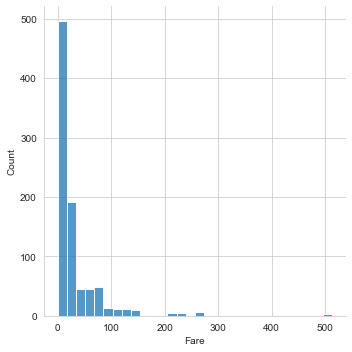

In [14]:
# Checking out the cruise fare distribution

sns.displot(data = train, x='Fare', bins=30)

###### This shows that more people bought tickets for 0-50 dollars.  

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

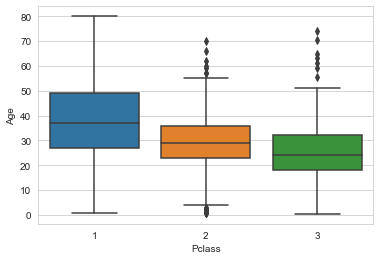

In [15]:
# We want to fill in blank age data with the mean of the age col.
# A better way is to set the mean age according to passenger class
# A box plot to show age and its mean in every passenger class

sns.boxplot(data = train, x= 'Pclass', y='Age')

In [16]:
train[train['Pclass']==1]['Age'].mean()
# 38

# train[train['Pclass']==2]['Age'].mean()
# 29

#train[train['Pclass']==3]['Age'].mean()
# 25 

38.233440860215055

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# Having gotten the average ages per passenger class,
# We can make a function that puts the mean age in a blank age according to its passenger class.

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [19]:
train['Age']=train[['Age','Pclass']].apply(impute_age, axis=1)

In [20]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

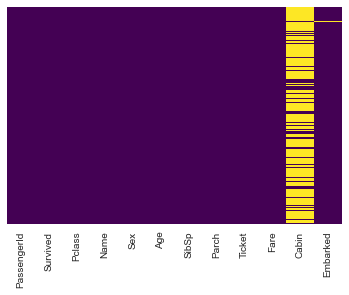

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
 # There are so many missing points in Cabin that its just wise to drop the column

    
train.drop('Cabin', axis = 1, inplace=True)

In [23]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

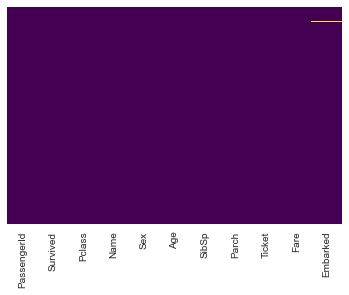

In [24]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
# Since the only missing value is just one or two, we can go ahead to drop the row
    
train.dropna(inplace=True)

<AxesSubplot:>

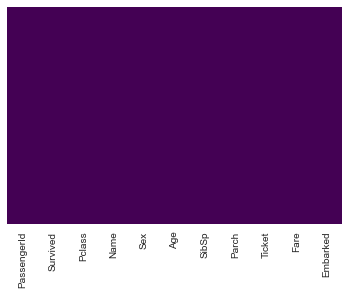

In [26]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

##### No missing values left, Data Cleaning stage 1 Done!!!


##### The other part is to convert categorical data to a format known to statistical models.
##### More like changing them into binary or dummy variables
##### This is because, an ML algorithm won't read strings, but will do well with numbers and dummy variables. 

In [27]:
# In thus case-study, we will take a look at cols Sex and Embarked
# For Sex, we assign a variable to the operation
# We ue the drop_first argument in order to drop one of the columns to get a true binary

sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [29]:
# Do similar for Embarked

embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [30]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [31]:
# Here we concatenate the three dataframes together

train = pd.concat([train, sex, embark], axis=1)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
# Encoding the sex and embarked columns to the new columns means we can leave them out.
# We will take out the Ticket and Name columns as well because they are in strings and ML algorithms won't interprete them well,
# Unless we can apply feature engineering to it.

train.drop(['Sex', 'Name', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [34]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [35]:
# Since the PassengerId is just another index, we should drop it.

train.drop(['PassengerId'], axis=1, inplace = True)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


##### Using Sci-kit Learn to do the train-test-split

In [37]:
# Make the target column y and feature columns X

X = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']]

# OR
# X = train.drop('Survived', axis=1)

y = train['Survived']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()

In [42]:
logmodel.fit(X_train, y_train)

C:\Users\Darasimi199\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
# You can call predictions off it using the test dataset

predictions = logmodel.predict(X_test)

predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Model Evaluation
1) There is a classification report you can use

2) Confusion matrix

In [44]:
# Seeing the clasification report
# Import the classification report

from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



#### Given the precision level, its okay to say our model is good enough.

In [46]:
# For confusion matrix

from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

### Thank you!!!